In [183]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline
import scipy.stats
import pylab
from sklearn.preprocessing import PowerTransformer

# Import Data

In [184]:
df = pd.read_csv('insurance.csv')

# EDA

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [186]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


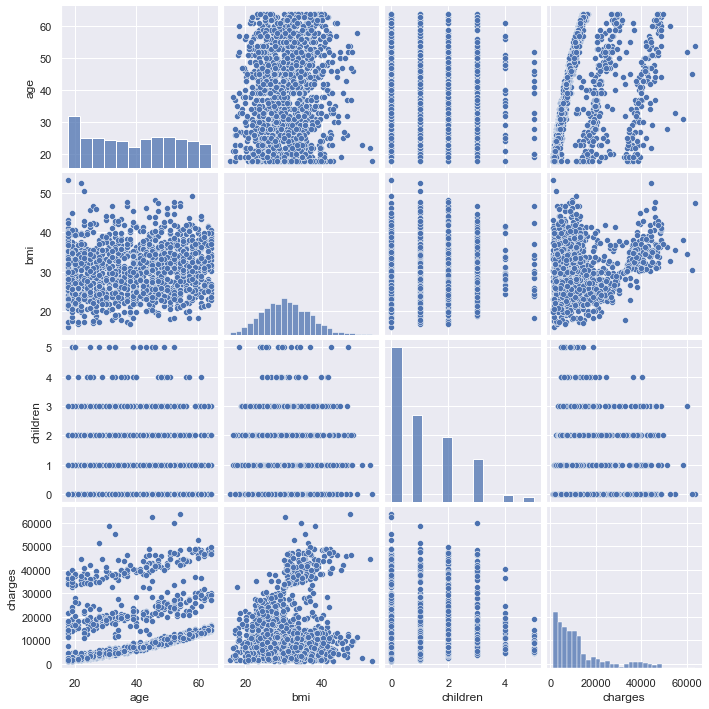

In [187]:
sns.pairplot(df)

# Discretization & Binning

### Age

In [188]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [189]:
age_bins = [18,25,55,64]

In [190]:
age_cat = pd.cut(df.age, age_bins, right = False)

In [191]:
age_cat.value_counts()

[25, 55)    818
[18, 25)    278
[55, 64)    220
Name: age, dtype: int64

In [192]:
df['age_cat'] = age_cat

In [193]:
age_group_names = ['young_adult','adult','senior']

df['age_cat'] = pd.cut(df.age, age_bins, right = False, labels = age_group_names)

### Bmi

In [194]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [195]:
bmi_bins = [0,18,30,60]

In [196]:
bmi_cat = pd.cut(df.bmi, bmi_bins, right = False)

In [197]:
bmi_cat.value_counts()

[30, 60)    707
[18, 30)    616
[0, 18)      15
Name: bmi, dtype: int64

In [198]:
bmi_group_names = ['Underweight','Healthy Weight','Obesity']

In [199]:
df['bmi_cat'] = pd.cut(df.bmi, bmi_bins, right = False, labels = bmi_group_names)

In [200]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,young_adult,Healthy Weight
1,18,male,33.770,1,no,southeast,1725.55230,young_adult,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,adult,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,adult,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,adult,Healthy Weight


# Dummy Variables

In [201]:
df = pd.get_dummies(df, columns = ['smoker', 'age_cat','bmi_cat'], drop_first = True)

In [202]:
df = df[['charges','smoker_yes','age_cat_adult','age_cat_senior'
         ,'bmi_cat_Healthy Weight','bmi_cat_Obesity']]

In [203]:
df.head()

,charges,smoker_yes,age_cat_adult,age_cat_senior,bmi_cat_Healthy Weight,bmi_cat_Obesity
0,16884.92400,1,0,0,1,0
1,1725.55230,0,0,0,0,1
2,4449.46200,0,1,0,0,1
3,21984.47061,0,1,0,1,0
4,3866.85520,0,1,0,1,0


<AxesSubplot:>

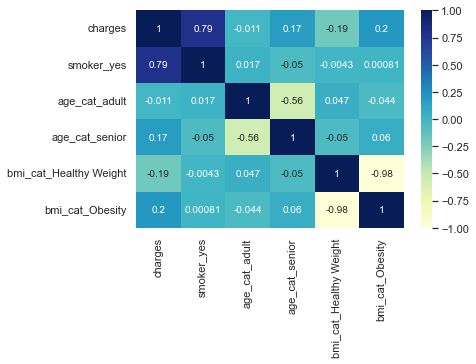

In [204]:
sns.heatmap(df.corr(),annot = True,vmin=-1 ,vmax=1, cmap="YlGnBu" )

Features bmi_cat_Healthy and bmi_cat_Obesity show multiculinearity 
as well as age_senior and age_adult. Features with the lowest correlation to 
dependent variable charges will be dropped.

In [205]:
df.drop(columns = ['bmi_cat_Healthy Weight','age_cat_adult'], inplace = True)

<AxesSubplot:>

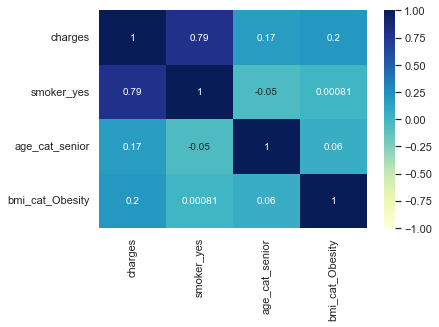

In [206]:
sns.heatmap(df.corr(),annot = True,vmin=-1 ,vmax=1, cmap="YlGnBu" )

Best dummy variable predictor is smoker_yes.